### Project 2: (10 points)
##### Total (20 points) --> your total will divided by 2 to get 10 points.

To demonstrate clustring, we will be use an adapted version of the glass dataset from the University of California – Irvine.
This data contains 218 observations and 9 features corresponding to the percent weight of various oxides found in glass:

* RI: refractive index
* Na: weight percent in sodium
* Mg: weight percent in magnesium
* Al: weight percent in aluminum
* Si: weight percent in silicon
* K: weight percent in potassium
* Ca: weight percent in calcium
* Ba: weight percent in barium
* Fe: weight percent in iron

In this case study, we will use the refractive index (RI) and weight percent in each oxide to segment the glass type.

**Dataset:**
You can find the dataset (glass.csv) under the datasets section on the Canvas.

### Step to do:

        1. Importing Packages Required:

In [43]:
#
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,fcluster
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import zscore

    2. Read the Data in the Memory.

In [2]:
glass_df = pd.read_csv("glass.csv")

    3. Print the Size of the Dataset and Printing the First Few Rows of the Dataset

In [14]:
print(glass_df.head(),'\n',"Size of the dataset is",str(len(glass_df))+'.')

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0 
 Size of the dataset is 218.


    4. Look for some basic data frame information  ( 1 point)

In [26]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      218 non-null    float64
 1   Na      218 non-null    float64
 2   Mg      218 non-null    float64
 3   Al      218 non-null    float64
 4   Si      218 non-null    float64
 5   K       218 non-null    float64
 6   Ca      218 non-null    float64
 7   Ba      218 non-null    float64
 8   Fe      218 non-null    float64
dtypes: float64(9)
memory usage: 15.5 KB


 5. Remove any possible order effects in the data by shuffle the rows prior to building any models and save it as a new data frame object.  ( 1 point)


In [29]:
change_glass_df = shuffle(glass_df)
change_glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
45,1.51900,13.49,3.48,1.35,71.95,0.55,9.00,0.00,0.00
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00
118,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.00,0.29
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.00,0.00
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31


    6. Transform each observation into a z-score  ( 1 point)

In [30]:
transform_glass_df=change_glass_df.apply(zscore)
transform_glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
45,0.297501,-0.125143,0.701027,-0.409564,-1.048221,0.272915,0.154009,-0.564343,-0.574543
36,0.327552,0.333944,0.731520,-0.465320,-1.232685,0.180817,-0.014627,-0.393967,-0.574543
118,-0.460435,-0.343210,0.798605,-0.075024,-0.284010,0.503161,-0.589522,-0.564343,2.779346
65,0.961948,0.104400,0.768112,-0.837031,-1.035045,-0.786215,0.460619,-0.564343,-0.574543
56,-1.989663,-0.699002,0.694929,-0.837031,0.308912,0.434087,-0.344234,-0.564343,3.010649


In [34]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(transform_glass_df)
print(scaled_df)

# Convert it into dataframe
scaled_df = pd.DataFrame(scaled_df, columns=transform_glass_df.columns)
print(scaled_df.head())


[[ 0.29750141 -0.12514337  0.70102744 ...  0.1540086  -0.56434318
  -0.57454325]
 [ 0.32755174  0.33394379  0.73152027 ... -0.0146273  -0.39396738
  -0.57454325]
 [-0.46043489 -0.34320977  0.7986045  ... -0.58952241 -0.56434318
   2.77934633]
 ...
 [-0.05976372 -0.44650438  0.70102744 ... -0.28291169 -0.56434318
  -0.57454325]
 [-0.50384093 -0.69900232  0.51807044 ...  0.0083685  -0.56434318
   2.2010895 ]
 [-0.62738121  0.62087327 -1.42127375 ...  0.29198343  1.07745994
  -0.57454325]]
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.297501 -0.125143  0.701027 -0.409564 -1.048221  0.272915  0.154009   
1  0.327552  0.333944  0.731520 -0.465320 -1.232685  0.180817 -0.014627   
2 -0.460435 -0.343210  0.798605 -0.075024 -0.284010  0.503161 -0.589522   
3  0.961948  0.104400  0.768112 -0.837031 -1.035045 -0.786215  0.460619   
4 -1.989663 -0.699002  0.694929 -0.837031  0.308912  0.434087 -0.344234   

         Ba        Fe  
0 -0.564343 -0.574543  
1 -0.3939

    7. Perform hierarchical clustering using the linkage function on scaled_features with complete method.  ( 1 point)

In [44]:
# create linkage model
hc_complete = linkage(scaled_df, method='complete')

Now that the HCA model has been built, we will continue with the analysis by visualizing clusters using a dendrogram and using the visualization to generate predictions.

    8. Display the dendrogram by plotting the HCA model:  ( 1 point)
    - the leaf_rotation is 90 and , leaf_font_size is 6

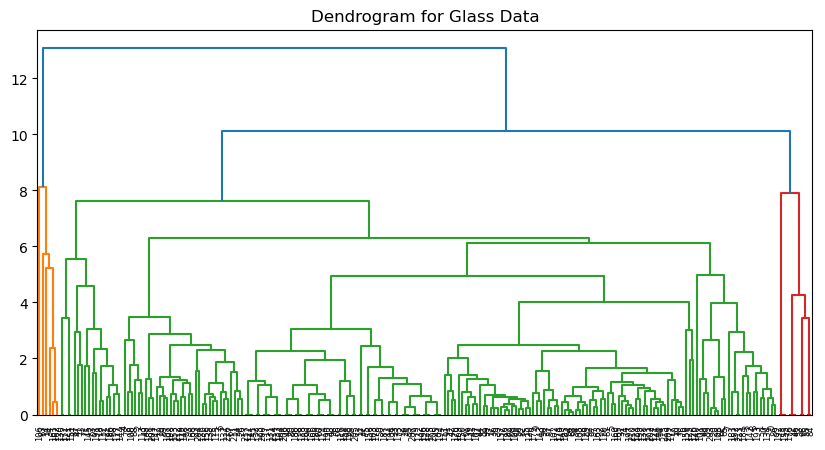

In [37]:
# plot dendrogram:

plt.figure(figsize=(10,5))
plt.title('Dendrogram for Glass Data')
dendrogram(hc_complete, leaf_rotation=90, leaf_font_size=6)
plt.show()

    9. interpret the HCA dendrogram,  ( 1 point)

Answer: There are 3 clusters . The second and third cluster form a cluster together as you can see a union of two clades. There are a no similarity among all the three clusters.

HCA has drawbacks include:

1. Vagueness in terms of the termination criteria (that is, when to finalize the number of clusters)
2. The algorithm cannot adjust once the clustering decisions have been made
3. Can be very computationally expensive to build HCA models on large datasets with many features

To address some of the HCA shortcomings,  use k-means, which has the ability to adjust when the clusters have been initially generated. It is more computationally frugal than HCA.

    10. Compute Silhouette score to measure how close observations within a cluster and plot the results.  ( 2 points)

In [45]:
labels = fcluster(hc_complete, 3, criterion='maxclust')
score = silhouette_score(scaled_df, labels)
print(" HCA Silhouette score:", score)

 HCA Silhouette score: 0.434993324184218


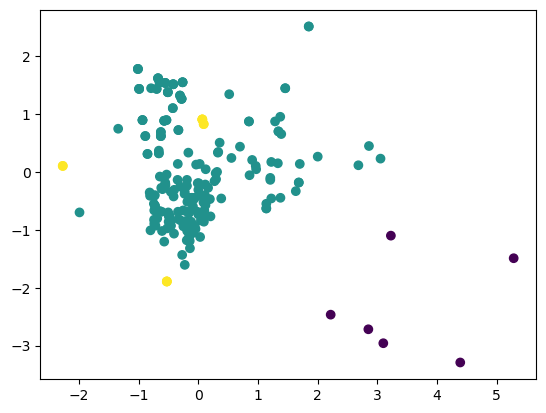

In [48]:
plt.scatter(scaled_df.values[:, 0], scaled_df.values[:, 1], c=labels)
plt.show()

    11. apply k-Means Clustering for Optimal Number of Clusters  ( 1 point)

In [49]:
km = KMeans(3)
km_clusters = km.fit_predict(scaled_df)

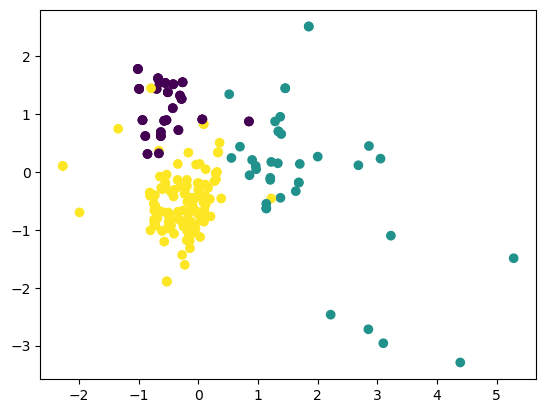

In [53]:
plt.scatter(scaled_df.values[:, 0], scaled_df.values[:, 1], c=km_clusters)
plt.show()

    12. print the number of glasses that fall within each of clusters. ( 2 points)

In [52]:
labels = km.labels_
counts = pd.Series(labels).value_counts()
print(counts)

2    121
0     59
1     38
dtype: int64


    13. Using PCA to Transform Group-Related Features into Components  ( 1 point)

In [149]:
pca=PCA(n_components=9).fit(scaled_df)

    14. Get proportion of explained variance in each component ( 2 points)

In [150]:
print(pca.explained_variance_ratio_)

[3.53143625e-01 2.50532563e-01 1.25244721e-01 9.69358544e-02
 9.26479607e-02 4.62631534e-02 2.77498886e-02 7.37245537e-03
 1.09779199e-04]


    15. Get the cumulative sum of explained variance by each component and plot the result.  ( 2 points)

In [151]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35314362, 0.60367619, 0.72892091, 0.82585676, 0.91850472,
       0.96476788, 0.99251777, 0.99989022, 1.        ])

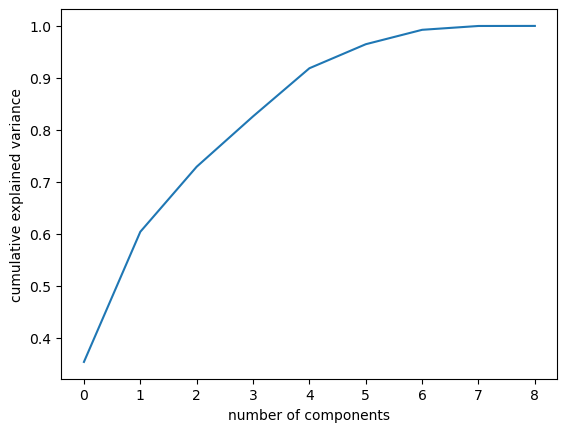

In [152]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [154]:
num_components_needed = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95)
print(f"Number of components needed to explain 95% of the variance: {num_components_needed}")

Number of components needed to explain 95% of the variance: 5


    16. Fit the PCA model with the best number of components ( 2 points)

In [155]:
pca_new=PCA(n_components=5).fit_transform(scaled_df)
pca_new

array([[ 1.03503944,  0.15796638, -1.01751376, -0.24951756,  0.29666276],
       [ 0.81206213,  0.3051108 , -1.41001697, -0.08895259,  0.19930941],
       [ 1.25223371, -0.99279291,  0.61460365,  2.03203907, -1.58137212],
       ...,
       [ 0.72854051, -0.68967162, -0.52931021, -0.46126852,  0.26185789],
       [ 1.37175866, -0.86141785,  1.10627277,  1.12393679, -1.16829642],
       [-2.78572715,  0.99390511,  0.41504614,  0.15523035, -0.06550186]])

    17. Plot the first and second components ( 2 points)

In [140]:
pc1 = pca_new[:, 0]
pc2 = pca_new[:, 1]

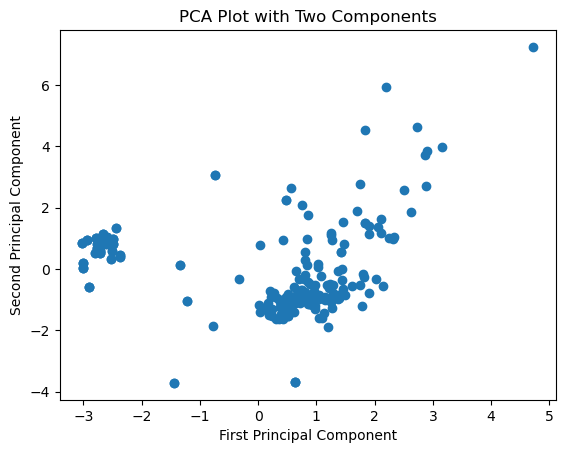

In [141]:
plt.scatter(pc1, pc2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Plot with Two Components')
plt.show()